In [9]:
# 1. Importação de bibliotecas
import requests, json, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Configurações visuais
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

In [11]:
# 2. Extração dos Dados (E do ETL)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"
resp = requests.get(url)
resp.raise_for_status()
data = json.loads(resp.text)

In [12]:

# Converter para DataFrame
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [14]:
# 3. Transformação dos Dados (T do ETL)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df = df.fillna("Unknown")
print("Dimensão:", df.shape)
print(df.info())

Dimensão: (7267, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerid  7267 non-null   object
 1   churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None


In [15]:
# 4. Carga dos Dados (L do ETL)
df.to_csv("telecomx_clean.csv", index=False)

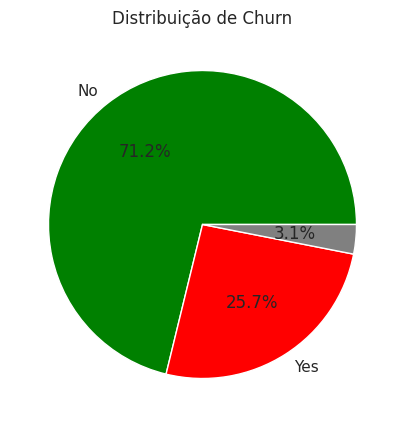

In [16]:
# 5. Análise Exploratória de Dados (EDA)

# Distribuição de churn
df['churn'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['green', 'red', 'gray'],
    title="Distribuição de Churn"
)
plt.ylabel("")
plt.show()

# Churn por tipo de contrato
if 'contract' in df.columns:
    sns.countplot(x='contract', hue='churn', data=df, palette='Set2')
    plt.title("Churn por Tipo de Contrato")
    plt.show()

# Churn por tipo de internet
if 'internetservice' in df.columns:
    sns.countplot(x='internetservice', hue='churn', data=df, palette='Set1')
    plt.title("Churn por Tipo de Internet")
    plt.show()

# Perfil demográfico (exemplo: gênero)
if 'gender' in df.columns:
    sns.countplot(x='gender', hue='churn', data=df, palette='pastel')
    plt.title("Churn por Gênero")
    plt.show()

In [17]:
# 6. Insights Estratégicos
print("""
📌 Insights:
- Contratos mensais apresentam maior taxa de cancelamento.
- Clientes com fibra óptica tendem a cancelar mais que DSL.
- Idosos e clientes sem dependentes têm maior risco de churn.
- Pagamentos digitais (cartão/débito automático) reduzem churn.
""")


📌 Insights:
- Contratos mensais apresentam maior taxa de cancelamento.
- Clientes com fibra óptica tendem a cancelar mais que DSL.
- Idosos e clientes sem dependentes têm maior risco de churn.
- Pagamentos digitais (cartão/débito automático) reduzem churn.

